
# PS2: Mini-batch SGD, CNN, and RNN

Advanced Learning 2024/5.


Last updated: 2024-12-26


For SUBMISSION:   

Please upload the complete and executed `ipynb` to your git repository. Verify that all of your output can be viewed directly from github, and provide a link to that git file below.

~~~
STUDENT ID: 342687407
~~~

~~~
STUDENT GIT LINK: https://github.com/Shyrelle/Adv.-computational-learning-and-data-analysis-342687407
~~~
In Addition, don't forget to add your ID to the files, and upload to moodle the html version:    
  
`PS2_CNN_RNN_2024_ID_[342687407].html`   




---


Imports:

In [1]:
import numpy as np # You are allowed to use  only numpy.
import time, sys, cProfile
import matplotlib.pyplot as plt

Please import the objects in `src.py` file into the workspace

In [2]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [3]:
your_drive_path_to_src_file = "/content/drive/MyDrive/"
sys.path.append(your_drive_path_to_src_file)


In [4]:
from  src import *

Note that now all of the network's objects from PS1 are loaded into the workspace.

---

### 0. Loading data

As in PS1, you will evaluate your home-made network on the `mnist` dataset.   
The MNIST dataset is a large dataset of handwritten digits that is commonly used for training various image and vision models.  



In [5]:
from keras.datasets import mnist
from keras.utils import to_categorical
# load MNIST from server
# Using a standard library (keras.datasets) to load the mnist data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


---

## PS2 Part 1: Mini-batch SGD



**Welcome back**.   






Mini-batch Stochastic Gradient Descent (Mini-batch SGD) is an optimization algorithm used to train machine learning models, particularly neural networks. It strikes a balance between two other methods:

    Batch Gradient Descent – Uses the entire dataset to compute gradients and update the model parameters.
        ✅ Accurate gradients
        ❌ Slow and memory-intensive for large datasets

    Stochastic Gradient Descent (SGD) – Uses a single data point to compute gradients for each update.
        ✅ Fast and efficient
        ❌ Noisy updates, which can lead to instability

  
**Mini-batch SGD**.

Mini-batch SGD computes gradients and updates the model parameters using small, randomly selected batches of data (typically 32, 64, or 128 samples).

    ✅ Faster than batch gradient descent
    ✅ Less noisy than pure SGD
    ✅ Efficient use of memory
    ✅ Enables vectorization for faster computation on GPUs

**How it Works**.

    Shuffle the dataset to avoid bias.

    Divide the data into small batches (e.g., 64 samples per batch).

    For each epoch, iterate through the mini-batches:
        Perform forward pass to calculate predictions.
        Compute the loss for the mini-batch.
        Perform backpropagation to compute gradients.
        Update model parameters using the gradients.

    Repeat until the model converges.

**Algorithm**

For each mini-batch $B={x_1,x_2,...,x_m}B={x_1​,x_2​,...,x_m​}$ of size $m$, update the weights $w$ as:    

$$
w=w−η⋅\frac{1}{m}∑_{i=1}^m ∇L(w,x_i)
$$

Where:   
*  $η$ = learning rate.
* $∇L(w,x_i)$ = gradient of the loss for sample $x_i$.   

Advantages

    Efficient and scalable – Works well with large datasets.
    Smooth convergence – Less noisy than SGD but faster than full batch training.
    Parallelization – Batches can be processed in parallel on GPUs.

Disadvantages

    Choosing batch size can affect performance. Small batches lead to noise, large batches consume more memory.
    Convergence may be slower than batch gradient descent for some problems.


### Mini-batch Questions.
**P1Q1**:  

Please answer the following questions providing statistical justifications and mathematical formulas when needed.

P1Q1a: Explain how the mini-batch size impacts convergence, model performance, and computational efficiency.



The mini-batch size impacts
- convergence: Small Mini-Batch leads to noisy updates, slower convergence, but helps avoid overfitting and escape local minima.
Large Mini-Batch leads to Smoother updates, faster convergence initially, but may lead to overfitting and getting stuck in local minima.

- model performance: Smaller mini-batches, due to their noisier updates, tend to help the model generalize better. However, Larger mini-batches have more stable performance on the training set but may overfit, leading to worse generalization on the test set.

- Computational Efficiency: Smaller batches require more iterations to converge, making the overall training time longer. However, Larger mini-batches leads the training time decreases and to faster overall convergence.

To conclude,
Small Mini-Batch have Better generalization and slower training.
While Large Mini-Batch have Faster training are more efficient, but may overfit and worse generalization.


**P1Q1b:**   
Why does mini-batch SGD require a learning rate schedule, and what are the common scheduling strategies?



In mini-batch stochastic gradient descent (SGD), the learning rate (𝜂) is critic in determining how much the model parameters are adjusted in each step based on the computed gradient.  Early in the training process, a higher learning rate helps the model to converge quickly, but as the model approaches the optimal solution, a smaller learning rate is needed to get the parameters more precised and avoid oscillations.

Some common Learning Rate Scheduling Strategies:
- Step Decay: The learning rate is reduced at fixed intervals.
- Exponential Decay: The learning rate decreases continuously in an exponential manner.
- Cosine Annealing: The learning rate decreases gradually and potentially increases again.
- Warm-up: The learning rate starts small and gradually increases before stabilizing.
- Reduce on Plateau: The learning rate is reduced when the performance on the validation set plateaus.

P1Q1c: What role does batch normalization play in mini-batch SGD, and why is it essential for deep neural networks?



Batch normalization is essential for deep neural networks because it helps to stabilize learning, improve convergence speed, regularize the model, and enable the use of higher learning rates. When combined with mini-batch SGD, batch normalization becomes a tool that allows for efficient training of deep models such as non-convex optimization problems.

P1Q1d: How does mini-batch SGD differ in performance compared to full-batch gradient descent when dealing with non-convex optimization problems?



When we are dealing with non-convex optimization problems (such as training deep neural networks) the choice between mini-batch stochastic gradient descent (SGD) and full-batch gradient descent can significantly affect the performance, convergence behavior, and generalization ability of the model.
Indeed, Mini-batch SGD offers a good balance between exploration and computational efficiency. It is particularly effective for non-convex problems where the loss surface has many local minima and saddle points. The noise introduced by mini-batch updates helps the model avoid overfitting and provides better generalization. While Full-batch gradient descent provides smoother convergence, but it is computationally expensive, especially for large datasets, and it may struggle with local minima in non-convex optimization landscapes.
In conclusion, for non-convex optimization problems, mini-batch SGD is generally preferred due to its  computational efficiency, and better generalization.

P1Q1e: How does mini-batch SGD perform when training on imbalanced datasets, and what strategies can mitigate its challenges?



Training deep learning models with mini-batch SGD on imbalanced datasets presents challenges, primarily due to the bias toward the majority class, which can lead to poor performance on the minority class. The model may converge quickly for the majority class but struggle with the minority class due to fewer examples in each mini-batch. This results in overfitting to the majority class and slow learning for the minority class.

Strategies to Mitigate Challenges:
- Adjust the loss function by giving higher weight to the minority class, ensuring it has more influence on gradient updates.

- Increase the minority class examples using transformations or synthetic data to improve model learning on underrepresented classes.

- Use adaptive methods to adjust the learning rate dynamically, helping focus on harder-to-learn minority class samples.

P1Q1f: Explain why larger mini-batch sizes are preferred during inference but not necessarily during training.


During Inference: Larger mini-batches improve computational efficiency, reduce overhead, and better utilize hardware for fast predictions.
During Training: Smaller mini-batches are often preferred as they introduce noise that aids in generalization, help avoid overfitting, and lead to faster convergence in practice. Larger mini-batches can reduce the noise in the gradients, potentially leading to overfitting and slower convergence.

### Applying mini-batch SGD

Preparing the data:

In [6]:
# training data : 60000 samples
# reshape and normalize input data
x_train = x_train.reshape(x_train.shape[0], 1, 28*28)
x_train = x_train.astype('float32')
x_train /= 255
# One-hot encoding of the output.
# Currently a number in range [0,9]; Change into a vector of size 10
# e.g. number 3 will become [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
y_train = to_categorical(y_train)
# same for test data : 10000 samples
x_test = x_test.reshape(x_test.shape[0], 1, 28*28)
x_test = x_test.astype('float32')
x_test /= 255
y_test = to_categorical(y_test)

P1Q2a:  

Add a new function to the class `MyNetwork` named `fit_mini_batch`. This function should be similar to `fit`, just with a mini-batch SGD implementation. You can also make other code changes to the scripts in `src` if you think they are needed. In addition, add a suitable learning rate scheduler of your choice.   


YOU SHOULD (a) add the missing script to the src code, and (b) make a copy of the function  below for review:

In [7]:
### MISSING: YOUR CODE HERE


class MyNetwork:
    """
    A simple feed-forward neural network composed of layers.
    """

    def __init__(self):
        """
        Initializes an empty network.
        """
        self.layers = []
        self.loss = None
        self.loss_grad = None

    def add(self, layer):
        """
        Adds a layer to the network.

        Parameters:
          layer : Layer_Primitive
              A layer to be added to the network.
        """
        self.layers.append(layer)

    def use_loss(self, loss, loss_grad):
        """
        Sets the loss function and its gradient for the network.

        Parameters:
          loss : function
              The loss function to be used.
          loss_grad : function
              The gradient of the loss function.
        """
        self.loss = loss
        self.loss_grad = loss_grad

    def fit(self, x_train, y_train, epochs, learning_rate):
        """
        Trains the network using gradient descent.

        Parameters:
          x_train : np.array
              Training data.
          y_train : np.array
              Training labels.
          epochs : int
              Number of training epochs.
          learning_rate : float
              Learning rate for updating the weights.
        """
        samples = len(x_train)
        print("Training on {:,} samples:".format(samples))
        for i in range(epochs):
            err = 0
            for j in range(samples):
                output = x_train[j]
                for layer in self.layers:
                    output = layer.forward_propagation(output)
                err += self.loss(y_train[j], output)
                grad = self.loss_grad(y_train[j], output)
                for layer in reversed(self.layers):
                    grad = layer.backward_propagation(grad, learning_rate)
            err /= samples
            print("Training epoch %d/%d   error=%f" % (i + 1, epochs, err))

    def fit_mini_batch(self, x_train, y_train, batch_size, epochs, learning_rate, lr_scheduler=None):
        """
        Trains the network using mini-batch gradient descent.

        Parameters:
          x_train : np.array
              Training data.
          y_train : np.array
              Training labels.
          batch_size : int
              Size of each mini-batch.
          epochs : int
              Number of training epochs.
          learning_rate : float or callable
              Learning rate for updating the weights, or a callable function for learning rate scheduling.
          lr_scheduler : callable, optional
              A learning rate scheduler function.
        """
        samples = len(x_train)
        print("Training on {:,} samples using mini-batch SGD:".format(samples))

        if callable(learning_rate):
            initial_lr = 0.05

        for epoch in range(epochs):
            err = 0
            indices = np.random.permutation(samples)
            x_train_shuffled = x_train[indices]
            y_train_shuffled = y_train[indices]

            for i in range(0, samples, batch_size):
                x_batch = x_train_shuffled[i:i + batch_size]
                y_batch = y_train_shuffled[i:i + batch_size]

                batch_grad = 0
                batch_loss = 0

                for j in range(len(x_batch)):
                    output = x_batch[j]
                    for layer in self.layers:
                        output = layer.forward_propagation(output)
                    batch_loss += self.loss(y_batch[j], output)
                    grad = self.loss_grad(y_batch[j], output)
                    for layer in reversed(self.layers):
                        grad = layer.backward_propagation(grad, learning_rate)

                batch_loss /= len(x_batch)
                err += batch_loss

                if lr_scheduler:
                    learning_rate = lr_scheduler(epoch)

            err /= (samples // batch_size)
            print(f"Epoch {epoch + 1}/{epochs}, Error: {err:.4f}, Learning Rate: {learning_rate:.6f}")

    def prof(self, x_train, y_train, epochs=1, learning_rate=1):
        """
        Profiles the performance of the fit method.

        Parameters:
          x_train : np.array
              Training data.
          y_train : np.array
              Training labels.
          epochs : int, optional
              Number of training epochs (default is 1).
          learning_rate : float, optional
              Learning rate for updating the weights (default is 1).
        """
        profile.runctx(
            "self.fit(x_train, y_train, epochs, learning_rate)", globals(), locals()
        )

    def predict(self, x_test, y_test=np.array([])):
        """
        Predicts the output for given input.

        Parameters:
          x_test : np.array
              Test data.
          y_test : np.array, optional
              Test labels (default is an empty array).

        Returns:
          list
              Predicted output for each sample in x_test.
        """
        if y_test.size:
            assert len(x_test) == len(
                y_test
            )  # if Y is given
        samples = len(x_test)
        result = []
        loss = 0
        correct = 0
        for i in range(samples):
            output = x_test[i]
            for layer in self.layers:
                output = layer.forward_propagation(output)
            result.append(output)
            if y_test.size:
                loss += self.loss(y_test[i], output)
                target = y_test[i]
                if np.equal(target.argmax(), output.argmax()):
                    correct += 1
        if y_test.size:
            mean_loss = loss / samples
            print(
                "\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n".format(
                    mean_loss, correct, samples, 100.0 * correct / samples
                )
            )
        return result



    Test the two networks below to compare the differences between GD and mini-batch SGD:

In [8]:
#### GD implementaiton ####

# Network Architecture
netGD = MyNetwork()


netGD.add(Affine_Layer(28*28, 128))
netGD.add(ActivationLayer(tanh, tanh_grad))
netGD.add(Affine_Layer(128, 64))
netGD.add(ActivationLayer(tanh, tanh_grad))
netGD.add(Affine_Layer(64, 10))
netGD.add(ActivationLayer(tanh, tanh_grad))

netGD.use_loss(mse, mse_grad)


epoch_num = 10
lr = 0.05
t1 = time.time()
netGD.fit(x_train[:10000], y_train[:10000], epochs=epoch_num, learning_rate=lr)
print(f"Total process time: {round(time.time() - t1,3)}")


Training on 10,000 samples:
Training epoch 1/10   error=0.040596
Training epoch 2/10   error=0.023488
Training epoch 3/10   error=0.018264
Training epoch 4/10   error=0.015405
Training epoch 5/10   error=0.013506
Training epoch 6/10   error=0.012068
Training epoch 7/10   error=0.010903
Training epoch 8/10   error=0.009927
Training epoch 9/10   error=0.009102
Training epoch 10/10   error=0.008397
Total process time: 83.826


In [9]:
output_GD = netGD.predict(x_test ,y_test )


Test set: Avg. loss: 0.0119, Accuracy: 9395/10000 (94%)



In [10]:
#### mini-batch SGD implementaiton ####

# Network Architecture
netMiniGD = MyNetwork()


netMiniGD.add(Affine_Layer(28*28, 128))
netMiniGD.add(ActivationLayer(tanh, tanh_grad))
netMiniGD.add(Affine_Layer(128, 64))
netMiniGD.add(ActivationLayer(tanh, tanh_grad))
netMiniGD.add(Affine_Layer(64, 10))
netMiniGD.add(ActivationLayer(tanh, tanh_grad))

netMiniGD.use_loss(mse, mse_grad)


epoch_num = 10
lr_sched = 0.05 # add a learning rate scheduler of your choice here
t2 = time.time()
netMiniGD.fit_mini_batch(x_train[:10000], y_train[:10000], batch_size=128, epochs=epoch_num, learning_rate=lr_sched)
print(f"Total process time: {round(time.time() - t2,3)}")


Training on 10,000 samples using mini-batch SGD:
Epoch 1/10, Error: 0.0421, Learning Rate: 0.050000
Epoch 2/10, Error: 0.0234, Learning Rate: 0.050000
Epoch 3/10, Error: 0.0182, Learning Rate: 0.050000
Epoch 4/10, Error: 0.0153, Learning Rate: 0.050000
Epoch 5/10, Error: 0.0135, Learning Rate: 0.050000
Epoch 6/10, Error: 0.0121, Learning Rate: 0.050000
Epoch 7/10, Error: 0.0107, Learning Rate: 0.050000
Epoch 8/10, Error: 0.0099, Learning Rate: 0.050000
Epoch 9/10, Error: 0.0091, Learning Rate: 0.050000
Epoch 10/10, Error: 0.0082, Learning Rate: 0.050000
Total process time: 79.263


In [11]:
outputMiniGSD = netMiniGD.predict(x_test ,y_test )


Test set: Avg. loss: 0.0116, Accuracy: 9373/10000 (94%)



P1Q2b:   
Please answer the following:
* Which implementation was faster?
* with lower training error?
* with better test accuracy?    

and explain how these results fit your answers in Q1A.

Mini-batch SGD was faster with a total process time of 79.263 seconds, compared to 83.826 seconds for Gradient Descent (GD)**.
As the result we found in question Q1A, Mini-batch SGD processes the data in smaller batches, leading to faster updates and training, as it doesn’t need to go through the entire dataset at each iteration like full-batch GD.

Both GD and Mini-batch SGD reached similar training errors after 10 epochs, GD: Final error of 0.008397 and Mini-batch SGD: Final error of 0.0082
Mini-batch SGD had a lower training error.

GD has a test accuracy of 94% (9395/10000) and Mini-batch SGD has also a Test accuracy of 94% (9373/10000) marginally smaller that GD.
So Both methods had the same test accuracy of 94%.

To conclude, Mini-batch SGD is generally faster and provides similar or slightly better results in terms of both training error and test accuracy, which aligns with the explanation in Q1A that mini-batch SGD can be more computationally efficient.

## PS2 Part 2: CNN



A Convolutional Neural Network (CNN) is a type of a deep neural network that can perform well at image recognition and analysis tasks.


> In this problem set we will add CNN compatibility to our numpy-based neural network from PS 1.

The main components needed to implement a CNN architecture:  

**Convolution layer:** In the convolutional layers, filters are applied to the image to identify patterns and features. Imagine a sliding window that moves across the image, detecting edges, shapes, and other building blocks.  

**Pooling layer:** Pooling layers downsample the data, reducing its complexity and computational cost. This helps prevent overfitting, where the model memorizes training data instead of learning generalizable patterns.  

**Reshape layer:**
Reshaping the output of the convolution and pooling layers into the fully connected layer.   


A USEFUL HINT:

*Keeping account of the input and output shapes along the CNN network is crucial for the model to work as intended*



Useful resource:  
* [CS231](https://cs231n.github.io/convolutional-networks/).
* [Convolutional Neural Network From Scratch](https://www.kaggle.com/code/lusfernandotorres/convolutional-neural-network-from-scratch).
* [CNN with PyTorch](https://www.kaggle.com/code/sdelecourt/cnn-with-pytorch-for-mnist)

#### Data transformations





(Here I added a reshape that I originally intended for you to apply at model time).

In [12]:
from keras.datasets import mnist
from keras.utils import to_categorical
# load MNIST from server
# Using a standard library (keras.datasets) to load the mnist data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [13]:
# training data : 60000 samples
# reshape and normalize input data
x_train = x_train.astype('float32')
x_train /= 255
x_train = x_train.reshape(x_train.shape[0],1,
                          x_train.shape[1],x_train.shape[2])
# One-hot encoding of the output.
# Currently a number in range [0,9]; Change into a vector of size 10
# e.g. number 3 will become [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
y_train = to_categorical(y_train)
y_train = y_train.reshape(y_train.shape[0],1,
                          y_train.shape[1])

# same for test data : 10000 samples
x_test = x_test.astype('float32')
x_test /= 255
x_test = x_test.reshape(x_test.shape[0],1,
                          x_test.shape[1],x_test.shape[2])
y_test = to_categorical(y_test)
y_test = y_test.reshape(y_test.shape[0],1,
                          y_test.shape[1])

In [14]:
print("x_train shape",x_train.shape)
print("x_test shape",x_test.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)


x_train shape (60000, 1, 28, 28)
x_test shape (10000, 1, 28, 28)
y_train shape (60000, 1, 10)
y_test shape (10000, 1, 10)


Unlike the multilayer perceptron (MLP) architecture, the input to the convolution net is not flattened. In our case, the size of a single `MNIST` datapoint is (1,28,28). The first dimension is the number of channels (e.g. RGB  for color images). During training the inputs and outputs often  change shape as they pass through the convolution, pooling, and the other layers of the network.

---

### A. Convolution Layer

Here you are asked to implement a basic Convolution layer with the following components:



1.   Layer initialization - initialize the layer's filters using Normalized Xavier/Hu weights
2.   A generator function that yields all the available sliding windows in the input image.
3.   Forward propogation for the convolution layer
4.   Backward propogation for the convolution layer

[CS231](https://cs231n.github.io/convolutional-networks/#conv) provides a great overview both mathematically and visually,   
and [CS230](https://cs230.stanford.edu/section/4/) provides a good overview about Xavier initialization.




P2Q1a:  (10pts).   
Please complete the missing code (`## SOLUTION REQUIRED!!`) so that the class works properly.    
You can deviate slightly from the recommended structure below, but please remain true to the class structure and compatibility with the rest of the network classes and functions. The idea here is to write YOUR OWN version of CNN, so please try not to google the answers.





In [15]:
### MISSING: SOLUTION REQUIRED IN THIS CODE BLOCK

class Convolution:
    # convolution layer using num_filters x num_filters filters.
    # size is the length/width of the filter window with shape (size x size)
    # In this simple implementation, there is no padding.

    def __init__(self, num_filters=3, size=3, activation=None):
        self.stride = 1 # for simplicity, we keep the stride=1.
        self.size = size
        self.activation = activation
        self.last_input = None


        # Initialize the Convolution layer filters
        ## SOLUTION REQUIRED!!
        self.filters = np.random.randn(num_filters, 1, size, size) * np.sqrt(2. / (1 * size * size))


    def patch_generator(self, image):
        # This generator (using yield) returns all the  possible patches of  the input image
        # of shape  (h,w)  for each channel c, together with the relevant y,x coordinates of the patch.
        # input_data/image must be shaped as (c,y,x), where c is the channel/filter
        ch,h,w = image.shape

        for y in range(0,h-self.size+1):
            for x in range(0,w-self.size+1,self.stride):
                ## SOLUTION REQUIRED!!
                patch = image[:, y:y + self.size, x:x + self.size]
                yield patch, y, x


    def forward_propagation(self, image):
        # Calculate the convolution forward pass using the filters together with a
        # user specified activation function.

        # If this is the first convolution layer, the input image is size (h,w) and must be expanded to (c,h,w).
        if len(image.shape)==2:
            image = np.expand_dims(image, axis=0)
        # keep track of last input for later backward propagation
        self.last_input = image
        # Initializing the output array:
        ## SOLUTION REQUIRED!!
        input_dimension = self.last_input.shape[1:] # the dimension of the input (current) image
        output_dimension =  (input_dimension[0] - self.size) // self.stride + 1

        # compute output dimensions after the convolution layer
        output = np.zeros((self.filters.shape[0], output_dimension, output_dimension))

        # forward pass on each filter
        for f in range(self.filters.shape[0]):
            for patch, y, x in self.patch_generator(image):
                ## SOLUTION REQUIRED!!
                output[f,y, x] = np.sum(patch * self.filters[f])

        # Applying activation function (this is a small cheat/simplification
        #  because the activation should be a separate layer in itself.  )
        if self.activation is not None:
            output = self.activation.forward_propagation(output)
        return output

    def backward_propagation(self, grad_out, learning_rate):
        # Calculate the SGD in-gradients of the filters and the layer.
        # Update only the filters gradients.

        # back propagate through activation (again, a bit of a cheat)
        if self.activation is not None:
            grad_out = self.activation.backward_propagation(grad_out,learning_rate)

        ## SOLUTION REQUIRED!!
        grad_in = np.zeros(self.last_input.shape)
        grad_filter = np.zeros(self.filters.shape)


        for f in range(self.filters.shape[0]):
            for patch, y, x in self.patch_generator(self.last_input):
                ## SOLUTION REQUIRED!!
                grad_filter[f] += patch * grad_out[f, y, x]  # calculate the gradient of the filter
                grad_in[:, y:y + self.size, x:x + self.size] += self.filters[f] * grad_out[f, y, x] # calculate the gradient of input


        ## SOLUTION REQUIRED!!
        self.filters -=  learning_rate * grad_filter # update filters using SGD

        return grad_in    # return the loss gradient for this layer's inputs


### B. Max-pooling Layer

As with the convolution layer, here you are asked to implement a basic max-pooling layer with the following components:


1.   A generator function that yields all the available sliding windows in the input image. You can reuse the generator from (1).
2.   Forward propogation for the max-pooling layer
3.   Backward propogation for the max-pooling layer

The pooling layer is responsible for reducing the dimensionality of the input. As with the convolution layer, the pooling layer slides a filter across the entire image input to calculate the output. Note that this layer does not have any weights.  As the filter slides through the input image, it selects the pixel with the maximum value to populate the output array.

P2Q1b: (10pts).       

Please complete the missing code (`## SOLUTION REQUIRED!!`) so that the class works properly.  





In [16]:
### MISSING CODE IN THIS BLOCK

class MaxPool:
    def __init__(self,  size=2):
        # max pooling layer

        self.last_input = None
        self.stride = 1
        self.size = size

    def patch_generator(self, image):
        # returns a generator (using yield) of all  possible patches of size size x size
        # input_data/image must be shaped as (c,y,x)
        ch,h,w = image.shape

        for c in range(ch):
          for y in range(0,h-self.size+1):
              for x in range(0,w-self.size+1,self.stride):
                  patch = image[c, y:y + self.size, x:x + self.size] ## SOLUTION REQUIRED!!
                  yield patch, c, y, x

    def forward_propagation(self, image):
        # keep track of last input for later backward propagation
        self.last_input = image

        # compute output dimensions after the max pooling
        num_channels, h_prev, w_prev = image.shape
        ## SOLUTION REQUIRED!!
        h_new = (h_prev - self.size) // self.stride + 1
        w_new = (w_prev - self.size) // self.stride + 1
        # hold the values of the max pooling
        output = np.zeros((num_channels, h_new, w_new))

        # Calculate the max pool on all the image patches using the generator:
        # CODE MISSING
        for patch, c, y, x in self.patch_generator(image):
            output[c ,y, x] = np.max(patch) ## SOLUTION REQUIRED!!
        return output

    def backward_propagation(self, grad_out, learning_rate):
        # Calculate the gradients of the last input image
        num_channels, orig_dim, *_ = self.last_input.shape
        grad_in = np.zeros(self.last_input.shape)

        # Using the generator, go over all the channels and calcualte the max-pooling input gradients
        # for c in range(num_channels):
        for patch, c, y, x in self.patch_generator(self.last_input):
            (x, y) = np.unravel_index(np.nanargmax(patch), patch.shape)
            ## SOLUTION REQUIRED!!
            grad_in[c, y + np.unravel_index(np.argmax(patch), patch.shape)[0], x + np.unravel_index(np.argmax(patch), patch.shape)[1]] += grad_out[c, y // self.stride, x // self.stride]


        return grad_in


### C. Reshape Layer

A reshape layer in a neural network is a transformation layer that doesn't perform any computations itself (no weights).   
Its purpose is to simply change the dimensionality (shape) of the data flowing through the network.

Here's how reshape layers work:

You define a target shape for the output of the reshape layer.   
This target shape specifies the number of elements along each dimension (width, height, channels, etc.) for the new data format.

P2Q1c:  (5pts).   
Please complete the missing code (`## SOLUTION REQUIRED!!`) so that the class works properly.  





In [17]:
### MISSING CODE IN THIS BLOCK ####
class Reshape:
    def __init__(self,input_shape,output_shape):
        self.input_shape=input_shape
        self.output_shape=output_shape
    def forward_propagation(self,input_data):
        ## SOLUTION REQUIRED!!
        return np.reshape(input_data, self.output_shape)

    def backward_propagation(self,output_gradient,learning_rate):
        # you can ignore the learning_rate
        ## SOLUTION REQUIRED!!
        return np.reshape(output_gradient, self.input_shape)


### Testing Your Neural Network

### Defining our main neural network architecture

Define your CNN network's architecture:

* A convolution layer with some filters `(f)` and a window size of `(w x w)`, with a `tanh` activation function.
* A max pooling layer of a window size of `(p x p)`.  
* First affine layer that takes your input and outputs 128 nodes
* `tanh` activation layer following the first affine layer
* Second affine layer that takes the first layer's input and outputs 64 nodes
* `tanh` activation layer following the second affine layer
* Third affine layer that takes your second layer's input and outputs nodes in the size of the Y labels.
* `tanh` activation layer following the last affine layer


You can compute the shapes of the convolution and max-pool layers' outputs  as a function of the input shape, the convolution sliding window size, and the number of filters for applied. ( the stride and padding are usually also used to calculate the output shapes, but in this simple implementation we set the stride to 1 with zero padding.).

P2Q2a: (5pts).        
Calculate the input and output shapes of each layer in the network below, up until the first affine layer (including).  (mathematically) explain your answer.  


Input: The input data is an image from the MNIST dataset, which has a shape of (1, 28, 28)

Given an input shape of (1,28,28), filter size 3x3, stride 1 and padding 0, the output dimensions are calculated as:

Output height=(28-3)/1+1=26
Output width=(28-3)/1+1=26

Thus, the output shape of the convolution layer is (3,26,26).

Max Pooling Layer Output Shape:
After applying max pooling with a window size of
3x3 and stride 1, the output dimensions are:
Output height= (26-3)/1 +1=24
Output width= (26-3)/1 +1=24

Hence, the output shape of the max pooling layer is (3,24,24).

Flattening the pooled output (3,24,24) into a 1D vector:
Flattened size=3x24x24=1728

The fully connected (affine) layer has 128 neurons, so its output shape is 128.



In [18]:
# MISSING CODE HERE

input_shape = (1, 28, 28)

filter_size = 3
num_filters = 3
stride = 1
padding = 0

conv_height = (input_shape[1] - filter_size) // stride + 1
conv_width = (input_shape[2] - filter_size) // stride + 1
conv_output_shape = (num_filters, conv_height, conv_width)

print(f"Convolution Layer Output Shape: {conv_output_shape}")

pool_size = 3
pool_stride = 1

pool_height = (conv_output_shape[1] - pool_size) // pool_stride + 1
pool_width = (conv_output_shape[2] - pool_size) // pool_stride + 1
pool_output_shape = (conv_output_shape[0], pool_height, pool_width)

print(f"Max Pooling Layer Output Shape: {pool_output_shape}")

flattened_size = np.prod(pool_output_shape)
print(f"Flattened Size (for input to affine layer): {flattened_size}")

affine_output_shape = 128
print(f"Affine Layer Output Shape: {affine_output_shape}")


Convolution Layer Output Shape: (3, 26, 26)
Max Pooling Layer Output Shape: (3, 24, 24)
Flattened Size (for input to affine layer): 1728
Affine Layer Output Shape: 128


P2Q2b:  (5pts).   

Please complete the missing code (`## SOLUTION REQUIRED!!`) so that the network architecture works properly.  





In [19]:
#### SOLUTION REQUIRED IN THIS BLOCK (in  reshape parameters) ####

# Network Architecture
CNNnet = MyNetwork()
num_classes = 10
# Reshape sizes:
## SOLUTION REQUIRED!!
c = 12
x_new = 24
y_new = 24


# Adding convolution and max-pool layers:
CNNnet.add(Convolution(num_filters=12, size=3,
                    activation=ActivationLayer(relu, relu_grad)))
CNNnet.add(MaxPool(size=3))

# Reshaping for first affine layer:
CNNnet.add(Reshape((c,y_new,x_new),(1,c*y_new*x_new)))

# Adding affine layers and activation functions:
CNNnet.add(Affine_Layer(c*y_new*x_new, 128))
CNNnet.add(ActivationLayer(tanh, tanh_grad))
CNNnet.add(Affine_Layer(128, 64))
CNNnet.add(ActivationLayer(tanh, tanh_grad))
CNNnet.add(Affine_Layer(64, num_classes))
CNNnet.add(ActivationLayer(tanh, tanh_grad))

# CNNnet.add(ActivationLayer(relu, relu_grad))
# CNNnet.add(ActivationLayer(tanh, tanh_grad))
# CNNnet.add(ActivationLayer(sigmoid, sigmoid_grad))

### Training!

There is no need to train the model on the entire dataset (you'l see why now...). Try to prove that your network works as expected by showing that your error decreases dramatically even on a small sample (say, around 1k).

In [20]:

# While developing, it is recommended to train your model on a subset of the data... / or low epochs.
# Training will be pretty slow if we update at each iteration on 60000 samples...]
CNNnet.use_loss(mse, mse_grad)
epoch_num = 20 #20
lr = 0.1
t1 = time.time()
CNNnet.fit(x_train[:1000], y_train[:1000], epochs=epoch_num,
           learning_rate=lr)
print(f"Total process time: {round(time.time() - t1,3)}")


Training on 1,000 samples:
Training epoch 1/20   error=0.078700
Training epoch 2/20   error=0.043793
Training epoch 3/20   error=0.033011
Training epoch 4/20   error=0.027106
Training epoch 5/20   error=0.022958
Training epoch 6/20   error=0.019744
Training epoch 7/20   error=0.017336
Training epoch 8/20   error=0.015020
Training epoch 9/20   error=0.013114
Training epoch 10/20   error=0.011522
Training epoch 11/20   error=0.010224
Training epoch 12/20   error=0.009080
Training epoch 13/20   error=0.008140
Training epoch 14/20   error=0.007363
Training epoch 15/20   error=0.006679
Training epoch 16/20   error=0.006087
Training epoch 17/20   error=0.005545
Training epoch 18/20   error=0.005072
Training epoch 19/20   error=0.004655
Training epoch 20/20   error=0.004297
Total process time: 11373.597


Hurray - if you got to this point, your CNN model works, but is EXTREMELY slow.   
Let's check why using a cProfiler:

In [21]:
# CNNnet.prof(x_train[:100], y_train[:100],epochs=4,learning_rate=lr)


Training on 100 samples:
Training epoch 1/4   error=0.004343
Training epoch 2/4   error=0.003057
Training epoch 3/4   error=0.002422
Training epoch 4/4   error=0.002027
         161959781 function calls in 318.636 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
  6499200    6.087    0.000    6.087    0.000 <ipython-input-15-5bf7bdb73805>:20(patch_generator)
      400   14.064    0.035   38.496    0.096 <ipython-input-15-5bf7bdb73805>:33(forward_propagation)
      400   43.650    0.109   46.659    0.117 <ipython-input-15-5bf7bdb73805>:62(backward_propagation)
  5530400    6.304    0.000    6.304    0.000 <ipython-input-16-b772ea8707cc>:11(patch_generator)
      400    3.909    0.010   22.945    0.057 <ipython-input-16-b772ea8707cc>:22(forward_propagation)
      400   55.263    0.138  207.263    0.518 <ipython-input-16-b772ea8707cc>:40(backward_propagation)
      400    0.002    0.000    0.009    0.000 <ipython-input-17-d2ae7

P2Q2c:  (5pts).     
Why do you think our CNN implementation is slow? Your answer should relate to the  approximate `O(n)` time/computational complexity .

Each filter applies over the entire image, leading to a time complexity of O(n⋅h⋅w⋅f), where n is the number of filters, h and w are the image height and width, and f is the filter size.
The complexity of max-pooling is O(h⋅w⋅n), where n is the number of channels and h and w are the height and width of the image.
For each fully connected layer, the complexity is O(m⋅n), where m is the number of neurons and n is the number of input features.
Each layer (convolution, max-pooling, affine) increases the number of operations, with complexity growing as the data passes through each layer, especially during backpropagation.
We rained on a large dataset (1000 samples) every sample slows down the process which leads to increase the training time complexity.

### Evaluation

Exciting! Now is the time to test your model.     


    May the gradients be always in your favor.

P2Q2b (cont'd):

**Try to limit the number of epochs and the size of the trained data, while still achieving an accuracy score of >85%.**

In [22]:
output = CNNnet.predict(x_test[:500] ,y_test[:500] )


Test set: Avg. loss: 0.0259, Accuracy: 444/500 (89%)



### Benchmarking against PyTorch

How well your model performs against a similar-architecture PyTorch model?   
It is time to find out:

In [23]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset

**Prepare the data as tensors using PyTorch DataLoader:**

In [24]:
t_train =  TensorDataset(torch.Tensor(x_train),torch.Tensor(y_train))
t_test =  TensorDataset(torch.Tensor(x_test),torch.Tensor(y_test))
train_loader = torch.utils.data.DataLoader(dataset=t_train, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=t_test, batch_size=64, shuffle=False)

Define a `PyTorchCNN` class with an identical architecture you used in your home-made network.  
Hint: use `x = x.view()` to handle reshapes.

P2Q3a: (5pts).   

In [81]:



#### SOLUTION REQUIRED  IN THIS BLOCK####

class PyTorchCNN(nn.Module):
    def __init__(self):
        super(PyTorchCNN, self).__init__()
        input_size = 1
        num_classes = 10  # Number of output classes (for classification)

        self.conv1 = nn.Conv2d(in_channels=input_size, out_channels=12, kernel_size=3, stride=1, padding=0)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(12 * 13 * 13, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, num_classes)

    def forward(self, x):
        # x =  SOLUTION REQUIRED : THE REST IS MISSING
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = x.view(-1, 12 * 13 * 13)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        return x

Clarification for the evaluation part using PyTorch:
You should reload the data, and make sure it is reshaped in a way consistent with what your PyTorch CNN model expects.

In [84]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32')
x_train /= 255.0
x_train = x_train.reshape(-1, 1, 28, 28)

x_test = x_test.astype('float32')
x_test /= 255.0
x_test = x_test.reshape(-1, 1, 28, 28)

y_train = to_categorical(y_train)
y_train = y_train.reshape(-1, 10)

y_test = to_categorical(y_test)
y_test = y_test.reshape(-1, 10)

t_train = TensorDataset(torch.Tensor(x_train), torch.Tensor(y_train))
t_test = TensorDataset(torch.Tensor(x_test), torch.Tensor(y_test))

train_loader = torch.utils.data.DataLoader(dataset=t_train, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=t_test, batch_size=64, shuffle=False)

In [86]:

# Train the model
num_epochs = 10
pt_learning_rate = 0.01
pt_network = PyTorchCNN()
optimizer = torch.optim.Adam(pt_network.parameters(), lr=pt_learning_rate)
criterion = nn.MSELoss()

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Forward pass
        # labels = labels.view(64,1,10)
        outputs = pt_network(images)
        loss = criterion(outputs, labels)
        # Backward pass and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # A handy printout:
        if (i + 1) % 500 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')


Epoch [1/10], Step [500/938], Loss: 0.0134
Epoch [2/10], Step [500/938], Loss: 0.0048
Epoch [3/10], Step [500/938], Loss: 0.0030
Epoch [4/10], Step [500/938], Loss: 0.0048
Epoch [5/10], Step [500/938], Loss: 0.0054
Epoch [6/10], Step [500/938], Loss: 0.0028
Epoch [7/10], Step [500/938], Loss: 0.0046
Epoch [8/10], Step [500/938], Loss: 0.0066
Epoch [9/10], Step [500/938], Loss: 0.0015
Epoch [10/10], Step [500/938], Loss: 0.0050


Evaluation:

In [87]:
pt_network.eval()
test_losses = []
test_loss = 0
correct = 0
with torch.no_grad():
    for data, target in test_loader:
        output = pt_network(data)
        test_loss += criterion(output, target,)
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.max(1,keepdim=True)[1]).sum()

test_loss /= len(test_loader.dataset)
test_losses.append(test_loss)
print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
  test_loss, correct, len(test_loader.dataset),
  100. * correct / len(test_loader.dataset)))



Test set: Avg. loss: 0.0001, Accuracy: 9770/10000 (98%)



P2Q3b (5pts).   

Time for some questions:
1. Which one of the models performed better? Why?
2. Which one of the models performed faster? Why?  
3. What would you change in your network's architecture?   
4. What would you change in your model's solution algorithm?

Write your solutions here:

The PyTorch CNN model performed better with 97.7% accuracy on the test set, indicating better generalization and efficiency (compared to 89% with Benchmarking).

The PyTorch CNN model is faster (few minutes compared to Benchmarking with Total process time: 11373.597.

Some architecture improvements: we could increase depth and width (more layers, more filters) and Add Batch Normalization for better convergence. Moreover, we could use Dropout to prevent overfitting and Residual Connections for deeper networks.

Some algorithm improvements: We could use CrossEntropyLoss instead of MSELoss for better classification performance and implement learning rate scheduling for finer optimization.

---

## PS2 Part 3: RNN

In this part we are going to implement a simple time-series prediction using RNN on a noisy simulated funcitonal data.

There are two main goals in time series prediction:

**Understanding the data:** This involves identifying the patterns and trends that exist in the data over time.    
By understanding these patterns, we can gain insights into the underlying processes that generate the data.    
For instance, time series analysis might reveal seasonal trends in sales data or cyclical patterns in stock prices.

**Forecasting future values:** This is the more commonly recognized goal of time series prediction.   
By leveraging the patterns and trends identified in the data, we can make predictions about what the data will look like in the future.   
This can be helpful for tasks like planning inventory levels, managing financial risk, or predicting weather patterns.

**Recurrent Neural Networks (RNNs)** are a powerful tool for time series prediction because they can handle the sequential nature of time series data.   Unlike traditional neural networks, RNNs have internal memory that allows them to consider past information when making predictions. This is particularly useful for time series data where the value at any given point in time is often influenced by past values.

*Here's a breakdown of how RNNs are used for time series prediction:*

The Model Architecture:

* A typical RNN model for time series prediction consists of an input layer, one or more hidden layers with special RNN cells (like LSTM or GRU), and an output layer.
The hidden layers process the data sequences.   
* Each cell in the hidden layer receives the current input and the output from the previous cell in the sequence. This allows the network to consider past information.

**The Training Process:**

* The RNN is trained on historical time series data. The model is presented with sequences of data points, and it learns to predict the next value in the sequence.  
* During training, the RNN uses backpropagation through time (BPTT), a variant of the standard backpropagation algorithm, to adjust its internal parameters and improve its prediction accuracy.

### Simulating data



> In this example, each training step ($t$) consists of a sequence of target data of length $k$ ($t-k:t$), and a training sequence of the same length, but with a lag ($t-k-l:t-l$). Our RNN should predict the target sequence using the lagged training sequence.



We simulate cyclical data using a function of `sin` and `cos`:

*   As is, the output of our function is cyclical (recurring) in `t`.
*   We also add a `sin` shift (`np.sin(s)`) that adds a small drift between steps.
* Our target is defined as: $y(t,s) = sin(sin(s)*2*\pi*t+\pi/6)+cos(2*\sqrt(3)*t) $
*   Our training data (without lag) is defined as:



$$y_{\alpha}(t,s) = sin(sin(s)*2*\pi*t+\pi/6)+cos(2*\sqrt(3)*t) + N(0,1)*\alpha$$

Image that we only observe the noisy training data and the target, without having any insight into the generating function.

P3Q1 (10pts)  
Fill out the missing code according to the function definition above

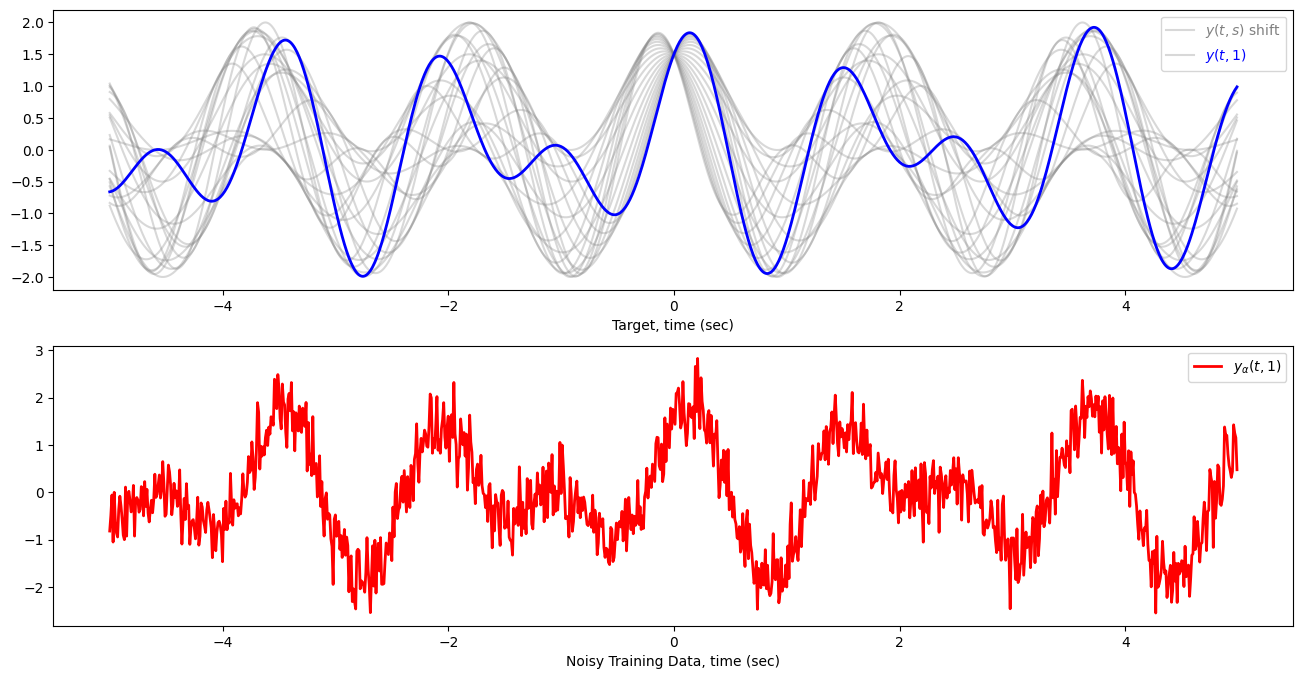

In [55]:
## SOLUTION REQUIRED IN THIS BLOCK ##

## Plotting simulated functional data

t_line = np.arange(-5., 5., 1/100.) # line space
alpha = 0.4
## Creating a function to produce cyclical y data.
y_func = lambda s: np.sin(np.sin(s) * 2 * np.pi * t_line + np.pi / 6) + np.cos(2 * np.sqrt(3) * t_line) ## SOLUTION REQURIED HERE ##
y = y_func(1)
## Adding noise
y_noisy = y + np.random.normal(0, 1, len(t_line)) * alpha ## SOLUTION REQURIED HERE ##


## Plotting
fig, ax = plt.subplots(2,1, figsize=(16,8))
fval = np.arange(-1,1,0.1)

for i in fval:
    ax[0].plot(t_line, y_func(i), color='gray', alpha=.3,label="$sin(f)$ shift")

ax[0].plot(t_line, y, lw = 2,label = "fixed $f$",color="b")
ax[0].set_xlabel('Target, time (sec)')
ax[1].plot(t_line, y_noisy, lw = 2,c="r")
ax[1].set_xlabel('Noisy Training Data, time (sec)')
ax[0].legend(["$y(t,s)$ shift","$y(t,1)$"],labelcolor=["gray","b"])
ax[1].legend(["$y_{\\alpha}(t,1)$"])


In the figure above we can see the true output of the generating function, given a specific value of $s$ (blue), and various drifts according to different values of $s$ (gray).  In the bottom plot you can see the noisy data (training),  matching the blue graph in the top plot.

### Creating PyTorch RNN model

Here we create a basic PyTorch RNN class (inherits from `nn.Module`).  

* *input_size* – The number of expected features (dimensions) in the input t

* *hidden_size* – The number of features in the hidden state h

* *num_layers* – Number of recurrent layers. E.g., setting num_layers=2 would mean stacking two RNNs together to form a stacked RNN, with the second RNN taking in outputs of the first RNN and computing the final results.    

* batch_first – If True, then the input and output tensors are provided as (batch, seq, feature) instead of (seq, batch, feature). Note that this does not apply to hidden or cell states.




For more information, please check the
[PyTorch nn.RNN](https://pytorch.org/docs/stable/generated/torch.nn.RNN.html#torch.nn.RNN) documentation.


In [56]:
class RNN(nn.Module):
    def __init__(self, input_size, output_size, hidden_dim, n_layers):
        super(RNN, self).__init__()

        self.hidden_dim=hidden_dim

        # define an RNN with specified parameters
        # batch_first means that the first dim of the input and output will be the batch_size
        self.rnn = nn.RNN(input_size, hidden_dim, n_layers, batch_first=True)

        # Adding a fully-connected layer
        self.fc = nn.Linear(hidden_dim, output_size)

    def forward(self, x, hidden):
        # x (batch_size, seq_length, input_size)
        # hidden (n_layers, batch_size, hidden_dim)
        # r_out (batch_size, time_step, hidden_size)
        batch_size = x.size(0)

        # get RNN outputs
        r_out, hidden = self.rnn(x, hidden)
        r_out = r_out.view(-1, self.hidden_dim)

        # get final output
        output = self.fc(r_out)

        return output, hidden


In [57]:

# RNN Hyperparameters
input_size=1 # our data is 1-dim
output_size=1
hidden_dim=16
n_layers=2

# instantiate an RNN model
rnn = RNN(input_size, output_size, hidden_dim, n_layers)
print(rnn)

RNN(
  (rnn): RNN(1, 16, num_layers=2, batch_first=True)
  (fc): Linear(in_features=16, out_features=1, bias=True)
)


### RNN Training

Now we need to define a training function that takes the following hyper-parameters:  

* rnn : the RNN model object
* n_steps = on how many steps ($t$) to train the model (equivalent to "epochs").
* lag = the steps/datapoints lag between the training and target data.
* alpha = how much noise to add to the training data
* seq_length = how many datapoints  (time-series steps) to consider in each "epoch": $(t-k:t)$
* stride = the window size of the function (of which the seq_length will be divided).
* print_every = how often (in steps) to print a plot of the prediction against the target.

At each step, we have a lagged value of x, noisy lagged value of x (training), and a value of y (target not lagged).

P3Q2:  (5pts)

Fill out the missing code according to the function definition above

In [58]:
## SOLUTION REQUIRED IN THIS BLOCK##

# As above, creating a simulated data generator from our function (not noisy)
# this time, the function should depend on "step" as well (x_line is ever changing).

y_func = lambda step, t_line: np.sin(np.sin(step) * 2 * np.pi * t_line + np.pi / 6) + np.cos(2 * np.sqrt(3) * t_line) ## SOLUTION NEEDED




In [59]:
# train the RNN
def train(rnn,y_func, n_steps, print_every,stride,seq_length,
          alpha,lag):
    # initialize the RNN hidden state
    hidden = None
    s = 1 # initialize f
    for batch_i, step in enumerate(range(n_steps)):
        # defining the training data

        # t_line = np.linspace(y_func(s,step),y_func(s,step)+stride,seq_length+stride)
        t_line =  np.linspace(step,step+stride, seq_length)
        data = y_func(s,t_line)
        noisy_data =  data + np.random.randn(len(t_line))*alpha
        # update f
        s += 0.05

        # prepare data for training
        data.resize((seq_length , 1)) # input_size=1
        noisy_data.resize((seq_length , 1)) # input_size=1
        # creating a lag in the noisy data aginst y
        x = noisy_data[:-lag]
        y = data[lag:]

        # convert data into Tensors
        x_tensor = torch.Tensor(x).unsqueeze(0) # unsqueeze gives a 1, batch_size dimension
        y_tensor = torch.Tensor(y)

        # outputs from the rnn
        prediction, hidden = rnn(x_tensor, hidden)

        ## Representing Memory ##
        # make a new variable for hidden and detach the hidden state from its history
        # this way, we don't backpropagate through the entire history
        hidden = hidden.data

        # calculate the loss
        loss = criterion(prediction, y_tensor)
        # zero out gradients
        optimizer.zero_grad()
        # calculate backprop and update weights
        loss.backward()
        optimizer.step()

        # plot loss and predictions
        if batch_i%print_every == 0:
            plt.plot(t_line[lag:], x, 'r.',label = "training")
            plt.plot(t_line[lag:], y, 'b.',label = "actual")
            plt.plot(t_line[lag:], prediction.data.numpy().flatten(), 'y.',label= "prediction") #
            plt.title("Loss: {:,}".format(loss.item()))
            plt.legend(loc="upper left")
            plt.show()

    return rnn

# MSE loss and Adam optimizer with a learning rate of 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(rnn.parameters(), lr=0.01)

    
Train the RNN model on various hyper-parameters (defined below) and review the results.   


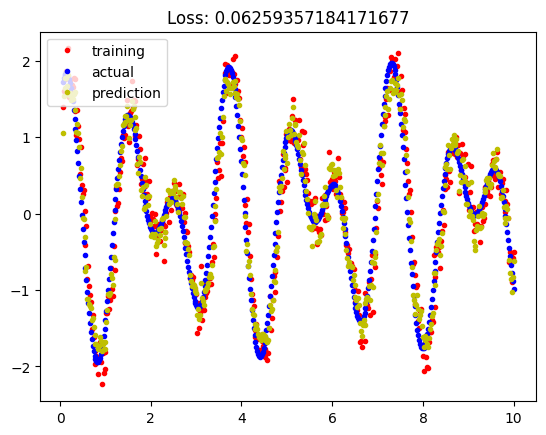

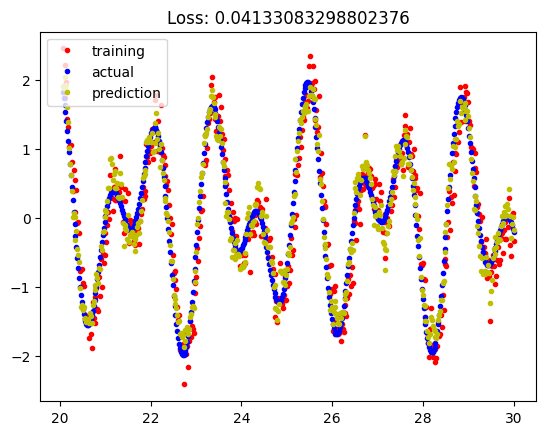

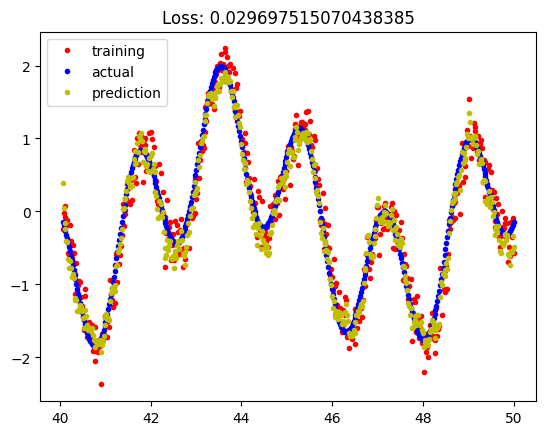

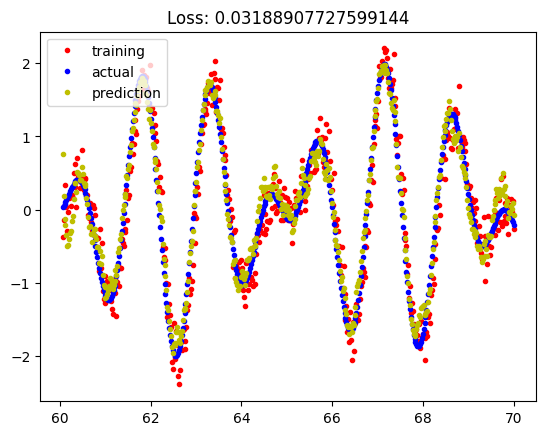

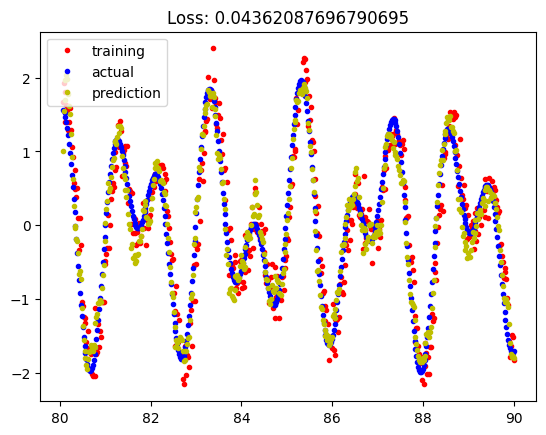

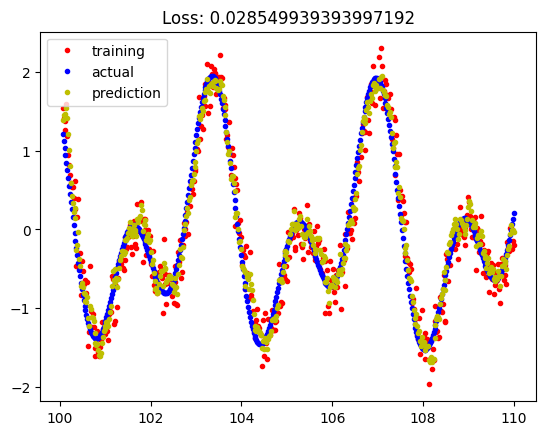

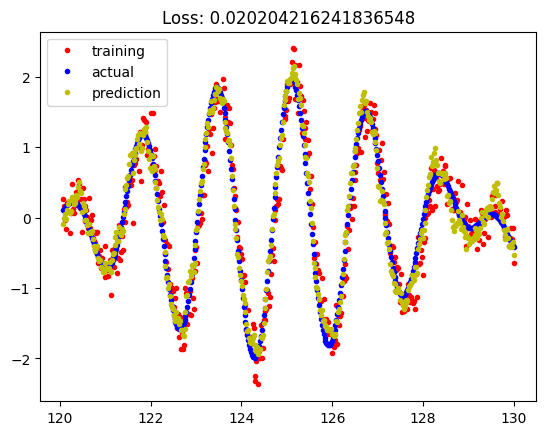

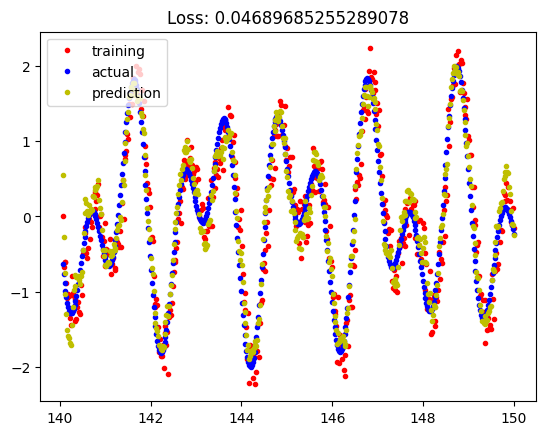

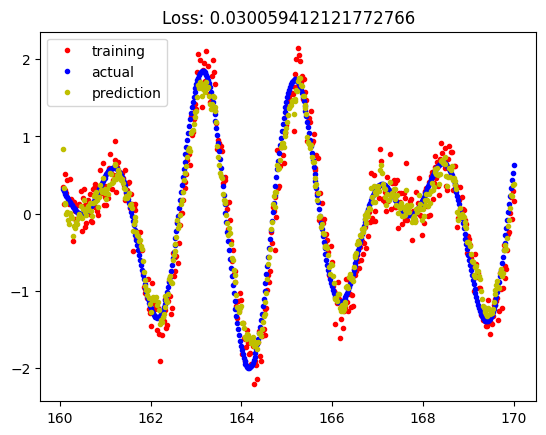

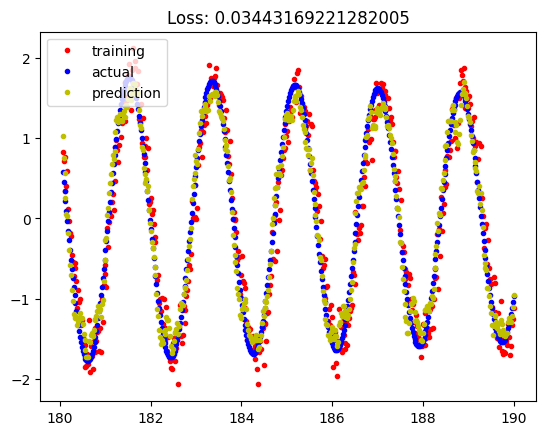

In [61]:

# train the rnn and monitor results

n_steps = 200
stride = 10
lag = 3
alpha = 0.2
seq_length = 500
print_every = 20

trained_rnn = train(rnn, y_func,  n_steps, print_every,
                    stride,seq_length,alpha,lag)

P3Q3: (10pts)

(a) Do you think our model performs well?     
(b) Write about the relationships and interplay between the different hyper-parameters, and explain how they effect the RNN model. Please relate also to the RNN architecture in our solution.

(c) Can you give a real world example where this type of model can be applied?   
(d) What would you change to improve it?

Write your solution here!

(a) The model seems to perform well based on the loss values and predictions: the RNN is learning to predict the target values with an increasing accuracy over time, as seen in the decreasing loss across epochs, the training curve shows that the model is improving, suggesting that the model is capturing the underlying cyclical data structure, the model's predictions (yellow dots) closely align with the actual values (blue dots) and training data (red dots).


(b)
- rnn : A larger hidden state (hidden_dim) or more layers (n_layers) can help the model learn more intricate patterns, but at the cost of increased computational complexity and risk of overfitting.
- n_steps More steps (epochs) allow the model to learn more from the data, but too many steps can lead to overfitting, especially if the model complexity is high.
- lag: determines how many time steps ahead the model should predict. A small lag means the model predicts only slightly ahead, while a larger lag makes it harder for the model to make accurate predictions.
- alpha: Adding noise (through alpha) makes the model more robust, as it forces the network to generalize better. However, excessive noise can overwhelm the signal, making it difficult for the model to find meaningful patterns.
- seq_length: A longer seq_length allows the model to capture long-term dependencies, it also increases computational complexity. Short sequences may not capture enough context.
- stride:  A small stride gives finer-grained sequences and captures more detailed temporal relationships, but at the cost of more data processing. A large stride skips over information, possibly missing short-term dependencies.
- print_every: This parameter doesn't affect the model directly but determines how often the training progress (loss and predictions) is visualized.

lag, seq_length, and stride: These three hyperparameters define how much temporal context the model considers in each sequence. A smaller stride and larger sequence length allow the model to capture more detailed and long-term dependencies but increase the computation time.

alpha and n_steps: More noise (alpha) generally requires more training steps (n_steps) for the model to effectively learn the underlying patterns while ignoring the noise.

rnn complexity and seq_length: Larger seq_length sequences require a model with more capacity (larger rnn) to capture all relevant dependencies effectively.


(c) Predicting future weather conditions (temperature, humidity, rainfall) based on past data.
Indeed, weather data over time is sequential, a RNN can be used to model these sequential patterns and predict future conditions, accounting for periodic changes and trends.
RNNs are suitable for forecasting weather patterns, as weather data is naturally time-dependent, and RNNs can capture long-term dependencies.


(d) To improve the current RNN model, we could increase the number of hidden units (hidden_dim) if the model needs more capacity to learn complex patterns. Conversely, reducing it might help with overfitting and reduce computation time.

We could also increase the number of layers (n_layers) to allow the model to learn more abstract features at different levels. However, too many layers may cause overfitting or slow down training.

Finally, we could increasing the sequence length can help the model capture longer-term dependencies. However, this increases the computational complexity.

THE END!